In [25]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree

import collections
import os
#import tensorflow as tf
from datetime import datetime
import numpy as np
import pandas as pd
import pickle as p
import random
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import DBSCAN,KMeans
#from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import scipy as sp
import pickle
from scipy.stats import itemfreq
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Flatten
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras import optimizers
import pandas as pd
import pickle as p
import random
import keras
from keras import backend as K
import tensorflow as tf
import nltk
import re
from nltk.corpus import stopwords 
from keras.layers import LeakyReLU
from nltk.tokenize import RegexpTokenizer
stop_words = set(stopwords.words('italian'))
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

In [26]:
data = pd.read_csv('2020_week5_predictions.csv',sep=';',dtype={'cod_mart':str,'cod_mdep':str,'codAgente':str,'codPtoVend':str})


In [27]:
data.head()

cod_mart cod_mdep  anno  settimana  ricorrenza  peso descr_mgrp  \
0   000060       10  2017          9           0  0.05     LA NEF   
1   000060       10  2017         10           0  0.05     LA NEF   
2   000060       10  2017         11           0  0.05     LA NEF   
3   000060       10  2017         12           0  0.05     LA NEF   
4   000060       10  2017         13           0  0.05     LA NEF   

                  descr_msgr              descr_msfa  qta_cnf  \
0  LA NEF ALTRI PROD. ITTICI  UOVA DI LOMPO NERO G50     12.0   
1  LA NEF ALTRI PROD. ITTICI  UOVA DI LOMPO NERO G50     12.0   
2  LA NEF ALTRI PROD. ITTICI  UOVA DI LOMPO NERO G50     12.0   
3  LA NEF ALTRI PROD. ITTICI  UOVA DI LOMPO NERO G50     12.0   
4  LA NEF ALTRI PROD. ITTICI  UOVA DI LOMPO NERO G50     12.0   

   gg_scad_partita  promoNoPromo  sum_promo  QtaMediaVendGiorn  \
0            240.0           0.0          0           0.000000   
1            240.0           0.0          0           0.000000   
2            240.0           0.0          0           0.000000   
3            240.0           0.0          0           1.666667   
4            240.0           0.0          0           1.250000   

   PrezzoMedioVendGiorn  week1_ptoVend  week2_ptoVend  week3_ptoVend  \
0              0.483333            0.0            0.0            0.0   
1              0.483333            0.0            0.0            0.0   
2              0.483333            0.0            0.0            0.0   
3              0.483333            5.0            0.0            0.0   
4              0.483333            0.0            5.0            0.0   

   week4_ptoVend  week5_ptoVend  week6_ptoVend  week7_ptoVend  prezzo_vendita  \
0            0.0            0.0            0.0            0.0            1.45   
1            0.0            0.0            0.0            0.0            1.45   
2            0.0            0.0            0.0            0.0            1.45   
3            0.0            0.0            0.0            0.0            1.45   
4            0.0            0.0            0.0            0.0            1.45   

   min_prezzo_vendita  max_prezzo_vendita  variazione_prezzo  \
0                 0.0                1.45                0.0   
1                 0.0                1.45                0.0   
2                 0.0                1.45                0.0   
3                 0.0                1.45                0.0   
4                 0.0                1.45                0.0   

   min_variazione_prezzo  max_variazione_prezzo  stdev_variazione_prezzo  \
0                    0.0                    0.0                      0.0   
1                    0.0                    0.0                      0.0   
2                    0.0                    0.0                      0.0   
3                    0.0                    0.0                      0.0   
4                    0.0                    0.0                      0.0   

   dev_std_30  media_30  media_15  media_7  QuantitaSostituita  inevaso  \
0    0.000000  0.000000  0.000000      0.0                 0.0      0.0   
1    0.000000  0.000000  0.000000      0.0                 0.0      0.0   
2    0.000000  0.000000  0.000000      0.0                 0.0      0.0   
3    0.000000  0.000000  0.000000      0.0                 0.0      0.0   
4    5.324256  1.894841  1.894841      2.5                 0.0      0.0   

   QuantitaResa  ConfRese  QuantitaOmaggi  qta_venduta  
0           0.0       0.0             0.0          0.0  
1           0.0       0.0             0.0          0.0  
2           0.0       0.0             0.0          5.0  
3           0.0       0.0             0.0          0.0  
4           0.0       0.0             0.0          3.0

In [28]:
data=data[~data.anno.isna()]

In [29]:
data['anno'] = data['anno'].astype('int')

In [30]:
data=data[(data.qta_venduta>=0) &(data.anno!=2021)]

In [31]:
data=data[data.anno>=2017]

In [32]:
data.columns

Index(['cod_mart', 'cod_mdep', 'anno', 'settimana', 'ricorrenza', 'peso',
       'descr_mgrp', 'descr_msgr', 'descr_msfa', 'qta_cnf', 'gg_scad_partita',
       'promoNoPromo', 'sum_promo', 'QtaMediaVendGiorn',
       'PrezzoMedioVendGiorn', 'week1_ptoVend', 'week2_ptoVend',
       'week3_ptoVend', 'week4_ptoVend', 'week5_ptoVend', 'week6_ptoVend',
       'week7_ptoVend', 'prezzo_vendita', 'min_prezzo_vendita',
       'max_prezzo_vendita', 'variazione_prezzo', 'min_variazione_prezzo',
       'max_variazione_prezzo', 'stdev_variazione_prezzo', 'dev_std_30',
       'media_30', 'media_15', 'media_7', 'QuantitaSostituita', 'inevaso',
       'QuantitaResa', 'ConfRese', 'QuantitaOmaggi', 'qta_venduta'],
      dtype='object')

In [33]:
df1 = data

In [34]:
df1 = df1[['cod_mart', 'cod_mdep','anno', 'settimana',
        'ricorrenza',
       'peso', 'descr_mgrp', 'descr_msgr', 'descr_msfa', 'qta_cnf',
       'gg_scad_partita', 'promoNoPromo', 'sum_promo','QtaMediaVendGiorn',
       'PrezzoMedioVendGiorn', 'week1_ptoVend', 'week2_ptoVend', 'week3_ptoVend',
       'week4_ptoVend', 'week5_ptoVend', 'week6_ptoVend', 'week7_ptoVend',
       'prezzo_vendita', 'min_prezzo_vendita',
       'max_prezzo_vendita', 'variazione_prezzo',
       'min_variazione_prezzo', 'max_variazione_prezzo',
       'stdev_variazione_prezzo', 'dev_std_30', 'media_30', 'media_15',
       'media_7','qta_venduta','inevaso','QuantitaSostituita','QuantitaResa']]#'media_30', 'media_15','media_7','qta_venduta','day1','day2','day3','day4','day5','day6','day7']],

In [35]:
df1=df1[df1.descr_mgrp!='PARMALAT']
#df1=df1[~df1.cod_mart.isin(df1.cod_mart.value_counts()[500:].index)]

In [36]:
target=df1.groupby(['cod_mart','cod_mdep', 'descr_mgrp', 'descr_msgr', 'descr_msfa']).mean().drop(['settimana','sum_promo','ricorrenza','peso'],axis=1)
#target2=df1.groupby(['cod_mart','cod_mdep','codAgente', 'descr_mgrp', 'descr_msgr', 'descr_msfa','codCliente','codPtoVend']).max().drop(['mese','GGmese','settimana','GGsettimana', 'sum_promo','ricorrenza','peso'],axis=1)

In [92]:
target.fillna(0,inplace=True)

In [93]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=20, max_iter=300)
kmeans.fit(target)
labels=kmeans.predict(target)
target['cluster']=labels

In [36]:
clusters=pd.read_csv('C:/Users/Administrator/Desktop/VG_Project/Agloritmi/clusters_week',dtype={'cod_mart':str,'cod_mdep':str})    
#df['cod_mart']=df.cod_mart.where(df.cod_mart.str[:1]!=str(0),df.cod_mart.str[1:])
df1 = pd.merge(df1,clusters,on=['cod_mdep','cod_mart', 'descr_mgrp', 'descr_msgr', 'descr_msfa'],how='left')
df1=df1[~df1.cluster.isna()]

In [ ]:
#introduzione stop_words
stop_words.add('lt')
stop_words.add('pz')
stop_words.add('pezzi')
stop_words.add('pezz')
stop_words.add('fresco')
stop_words.add('freschi')
stop_words.add('chef')
stop_words.add('int')
stop_words.add('gr')
stop_words.add('kg')
stop_words.add('cucina')
stop_words.add('flash')
stop_words.add('intero')
stop_words.add('scremato')
stop_words.add('parz')
stop_words.add('ca')
stop_words.add('uh')
stop_words.add('uht')
stop_words.add('%')
stop_words.add('g')
stop_words.add('fr')
stop_words.add('fresca')
stop_words.add('fresche')
stop_words.add('mix')
stop_words.add('bio')
stop_words.add('gran')
stop_words.add('picc')
stop_words.add('sv')
stop_words.add('grande')
stop_words.add('piccolo')
stop_words.add('rosso')
stop_words.add('nero')
stop_words.add('giallo')
stop_words.add('verde')
stop_words.add('arancione')
stop_words.add('blu')
stop_words.add('più')
stop_words.add('piu')
stop_words.add('pf')
stop_words.add('l')
stop_words.add('ml')
stop_words.add('mg')

#ripulisco gruppo sottogruppo e sottofamiglia
a= df1[['cod_mart','descr_mgrp','descr_msgr','descr_msfa']].drop_duplicates()
a.descr_mgrp.fillna('',inplace=True)
a.descr_msgr.fillna('',inplace=True)
a.descr_msfa.fillna('',inplace=True)
new_df=pd.DataFrame(data=a)

for i in range(len(a)):
    row=a.iloc[i]
    word_tokenize= RegexpTokenizer(r'\w+')
    mgrp = word_tokenize.tokenize(row[1])
    msgr = word_tokenize.tokenize(row[2])
    msfa = word_tokenize.tokenize(row[3])
    msgr1  = [word for word in msgr if word not in mgrp and not re.search("\d", word) and not word.lower()  in stop_words]
    msfa1 = [word for word in msfa if word not in mgrp  and not re.search("\d", word) and not word.lower()  in stop_words]
    msfa2 = [word for word in msfa1 if word not in msgr and not re.search("\d", word) and not word.lower()  in stop_words]
    if len(msgr1)==0:
        msgr1=msgr
    if len(msfa1)==0:
        msfa1=msfa
    if len(msfa2)==0:
        msfa2=msfa1
    new_df.loc[new_df['cod_mart']==row.cod_mart,'descr_msgr']= ' '.join(msgr1)
    new_df.loc[new_df['cod_mart']==row.cod_mart,'descr_msfa']= ' '.join(msfa2)
    

#Applico TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
corpus =new_df.descr_msfa
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

def min_sparse(X):
    if len(X.data) == 0:
        return 0
    m = X.data.min()
    return m if X.getnnz() == X.size else min(m, 0)

from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

'''ps = SnowballStemmer('italian')
descr_msfa=[]
for i in range(len(corpus)):
    trovato=False
    for j in X[i].indices:
        if X[i,j]==min_sparse(X[i]):
            descr_msfa.append(ps.stem(vectorizer.get_feature_names()[j]))
            trovato=True
            break
    if trovato==False:
        descr_msfa.append(new_df.iloc[i].descr_msgr)
new_df['descr_msfa']=descr_msfa
'''
df1.rename(columns={'descr_mgrp':'d1','descr_msgr':'d2','descr_msfa':'d3'}, inplace=True)
df1=df1.merge(new_df, how='left', on ='cod_mart')

In [ ]:
import gensim
from sklearn.decomposition import PCA
model=  gensim.models.KeyedVectors.load_word2vec_format("model.bin",binary=True)
def avg_sentence(sentences, wv):
    first=True
    for sentence in sentences:
        v = np.zeros(100)
        for w in sentence.split():
            if w.lower() in wv:
                v += wv[w.lower()]
        if first:
            df=pd.DataFrame((v / len(sentence.split()))).T
            first=False
        else: 
            df1=pd.DataFrame((v / len(sentence.split()))).T
            df=df.append(df1)
    return df
df2=df1[['cod_mart','descr_mgrp','descr_msgr','descr_msfa']].drop_duplicates()
df =avg_sentence(df2['descr_mgrp'].astype(str) + " "+ df2['descr_msgr'].astype(str)+" " + df2['descr_msfa'].astype(str),model).reset_index(drop=True)

pca = PCA(10)
pca.fit(df.fillna(0.0))
df=pd.DataFrame(pca.transform(df.fillna(0)))
df2=pd.concat([df,df2['cod_mart'].reset_index(drop=True)],axis=1)
df1=df1.merge(df2, how='left', on ='cod_mart')

In [ ]:
cardinality=df1['cod_mart'].unique()
sales_mapping_art = dict(zip(cardinality, range(0, len(cardinality))))
df1['cod_mart'] = df1['cod_mart'].map(sales_mapping_art).astype(int)

cardinality=df1['cod_mdep'].unique()
sales_mapping_dep = dict(zip(cardinality, range(0, len(cardinality))))
df1['cod_mdep'] = df1['cod_mdep'].map(sales_mapping_dep).astype(int)

cardinality=df1['descr_mgrp'].unique()
sales_mapping_descr_mgrp = dict(zip(cardinality, range(0, len(cardinality))))


cardinality=df1['descr_msgr'].unique()
sales_mapping_descr_msgr = dict(zip(cardinality, range(0, len(cardinality))))

cardinality=df1['descr_msfa'].unique()
sales_mapping_descr_msfa = dict(zip(cardinality, range(0, len(cardinality))))


unique_dict={}
elements=df1[['d1','d2','d3','descr_mgrp','descr_msgr','descr_msfa',\
0,1,2,3,4,5,6,7,8,9]].drop_duplicates()
for element in range(len(elements)):
    row=elements.iloc[element]
    val=str(elements['d1'].values[element])+" "+str(elements['d2'].values[element])+" "+str(elements['d3'].values[element])
    if val not in unique_dict:
        unique_dict[val]={'descr_mgrp':'','descr_msgr':'','descr_msfa':'','0':0 ,'1':0 ,'2':0 ,'3':0 ,'4':0 ,'5':0 ,'6':0 ,'7':0 ,'8':0 ,'9':0 ,}
        unique_dict[val]['descr_mgrp']=sales_mapping_descr_mgrp[row.descr_mgrp]
        unique_dict[val]['descr_msgr']=sales_mapping_descr_msgr[row.descr_msgr]
        unique_dict[val]['descr_msfa']=sales_mapping_descr_msfa[row.descr_msfa]
        unique_dict[val]['0']=row[0]
        unique_dict[val]['1']=row[1]
        unique_dict[val]['2']=row[2]
        unique_dict[val]['3']=row[3]
        unique_dict[val]['4']=row[4]
        unique_dict[val]['5']=row[5]
        unique_dict[val]['6']=row[6]
        unique_dict[val]['7']=row[7]
        unique_dict[val]['8']=row[8]
        unique_dict[val]['9']=row[9]

        
df1.drop(['d1','d2','d3'],axis=1, inplace=True)
df1['descr_mgrp'] = df1['descr_mgrp'].map(sales_mapping_descr_mgrp).astype(int)
df1['descr_msgr'] = df1['descr_msgr'].map(sales_mapping_descr_msgr).astype(int)
df1['descr_msfa'] = df1['descr_msfa'].map(sales_mapping_descr_msfa).astype(int)

In [ ]:
np.save('dictionaries/unique_dict_week.npy', unique_dict)


In [37]:
df1['anno'] = df1['anno'].astype('int')

In [38]:
unique_dict = np.load('C:/Users/Administrator/Desktop/VG_Project/Agloritmi/dictionaries/unique_dict_week.npy',allow_pickle=True).item()
unique_df=pd.DataFrame.from_dict(unique_dict, orient='index').reset_index()
unique_df.rename(columns={'index':'descr_join'}, inplace=True)
df1['descr_join']=df1['descr_mgrp'].astype(str)+" "+df1['descr_msgr'].astype(str)+" "+df1['descr_msfa'].astype(str)
df1.drop(['descr_mgrp','descr_msgr','descr_msfa'], axis=1, inplace=True)
df1 = df1.merge(unique_df,on=['descr_join'],how='left')

In [39]:
df1.drop('descr_join',axis=1,inplace=True)    

In [40]:
df_train = df1.loc[(df1['anno']!=2020)|((df1['anno']==2020) & ((df1.settimana<7) | (df1.settimana>21)))] 
df_val = df1.loc[(df1['anno'] ==2020)] 
df_test=df1.loc[df1['anno'] ==2020]

In [41]:
df_val.drop('anno',axis=1, inplace=True)
df_train.drop('anno',axis=1 , inplace=True)
df_test.drop('anno',axis=1 , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
X, y =df_train.drop(['cod_mart','qta_venduta'],axis=1),df_train['qta_venduta']
#X_train, X_test,X_val, y_train, y_test,y_val=X,df_test.drop(['qta_venduta'],axis=1),df_val.drop(['cod_mart','qta_venduta'],
 #                                                                                                axis=1),y,df_test['qta_venduta'],df_val['qta_venduta']
X_train,X_val,X_test, y_train,y_val,y_test=X,df_val.drop(['cod_mart','qta_venduta'],axis=1),\
                                            df_test.drop(['cod_mart','qta_venduta'],axis=1),\
                                            y,df_val['qta_venduta'],df_test['qta_venduta']


In [43]:
X_val.drop(['QuantitaResa','inevaso','QuantitaSostituita'],axis=1,inplace=True)
X_train.drop(['QuantitaResa','inevaso','QuantitaSostituita'],axis=1,inplace=True)
X_test.drop(['QuantitaResa','inevaso','QuantitaSostituita'],axis=1,inplace=True)
X_test.fillna(25,inplace=True)
X_train.fillna(25,inplace=True)
X_val.fillna(25,inplace=True)
X_train.cod_mdep=0
X_val.cod_mdep=0

In [44]:
X_train.head()

cod_mdep  settimana  ricorrenza  peso  qta_cnf  gg_scad_partita  \
0         0          9           0  0.05     12.0            240.0   
1         0         10           0  0.05     12.0            240.0   
2         0         11           0  0.05     12.0            240.0   
3         0         12           0  0.05     12.0            240.0   
4         0         13           0  0.05     12.0            240.0   

   promoNoPromo  sum_promo  QtaMediaVendGiorn  PrezzoMedioVendGiorn  \
0           0.0          0           0.000000              0.483333   
1           0.0          0           0.000000              0.483333   
2           0.0          0           0.000000              0.483333   
3           0.0          0           1.666667              0.483333   
4           0.0          0           1.250000              0.483333   

   week1_ptoVend  week2_ptoVend  week3_ptoVend  week4_ptoVend  week5_ptoVend  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            5.0            0.0            0.0            0.0            0.0   
4            0.0            5.0            0.0            0.0            0.0   

   week6_ptoVend  week7_ptoVend  prezzo_vendita  min_prezzo_vendita  \
0            0.0            0.0            1.45                 0.0   
1            0.0            0.0            1.45                 0.0   
2            0.0            0.0            1.45                 0.0   
3            0.0            0.0            1.45                 0.0   
4            0.0            0.0            1.45                 0.0   

   max_prezzo_vendita  variazione_prezzo  min_variazione_prezzo  \
0                1.45                0.0                    0.0   
1                1.45                0.0                    0.0   
2                1.45                0.0                    0.0   
3                1.45                0.0                    0.0   
4                1.45                0.0                    0.0   

   max_variazione_prezzo  stdev_variazione_prezzo  dev_std_30  media_30  \
0                    0.0                      0.0    0.000000  0.000000   
1                    0.0                      0.0    0.000000  0.000000   
2                    0.0                      0.0    0.000000  0.000000   
3                    0.0                      0.0    0.000000  0.000000   
4                    0.0                      0.0    5.324256  1.894841   

   media_15  media_7  cluster  descr_mgrp  descr_msgr  descr_msfa         0  \
0  0.000000      0.0      0.0           0           0           0 -0.255379   
1  0.000000      0.0      0.0           0           0           0 -0.255379   
2  0.000000      0.0      0.0           0           0           0 -0.255379   
3  0.000000      0.0      0.0           0           0           0 -0.255379   
4  1.894841      2.5      0.0           0           0           0 -0.255379   

         1         2         3         4         5         6        7  \
0  0.24778  0.010177  0.190013 -0.252226  0.182415  0.132438 -0.15657   
1  0.24778  0.010177  0.190013 -0.252226  0.182415  0.132438 -0.15657   
2  0.24778  0.010177  0.190013 -0.252226  0.182415  0.132438 -0.15657   
3  0.24778  0.010177  0.190013 -0.252226  0.182415  0.132438 -0.15657   
4  0.24778  0.010177  0.190013 -0.252226  0.182415  0.132438 -0.15657   

          8         9  
0  0.356519 -0.078563  
1  0.356519 -0.078563  
2  0.356519 -0.078563  
3  0.356519 -0.078563  
4  0.356519 -0.078563

# XGBoost

In [45]:
X_train['cod_mdep']=X_train['cod_mdep'].astype('int64')
X_val['cod_mdep']=X_val['cod_mdep'].astype('int64')
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1,min_child_weight=2, learning_rate = 0.05,tree_method='hist',
                 n_estimators = 1000, max_depth=15,n_jobs=128,tweedie_variance_power=1.5,colsample_bylevel=0.9,colsample_bynode=0.9)
xg_reg2.fit(X_train,y_train)
preds2 = xg_reg2.predict(X_val)
mab = mean_absolute_error(y_val, preds2)
print(mab)
sum(preds2)-sum(y_val)

[13:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { tweedie_variance_power } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


24.886027925285013


-2633.762029496953

In [46]:
xg_reg2.save_model('5_model.json')

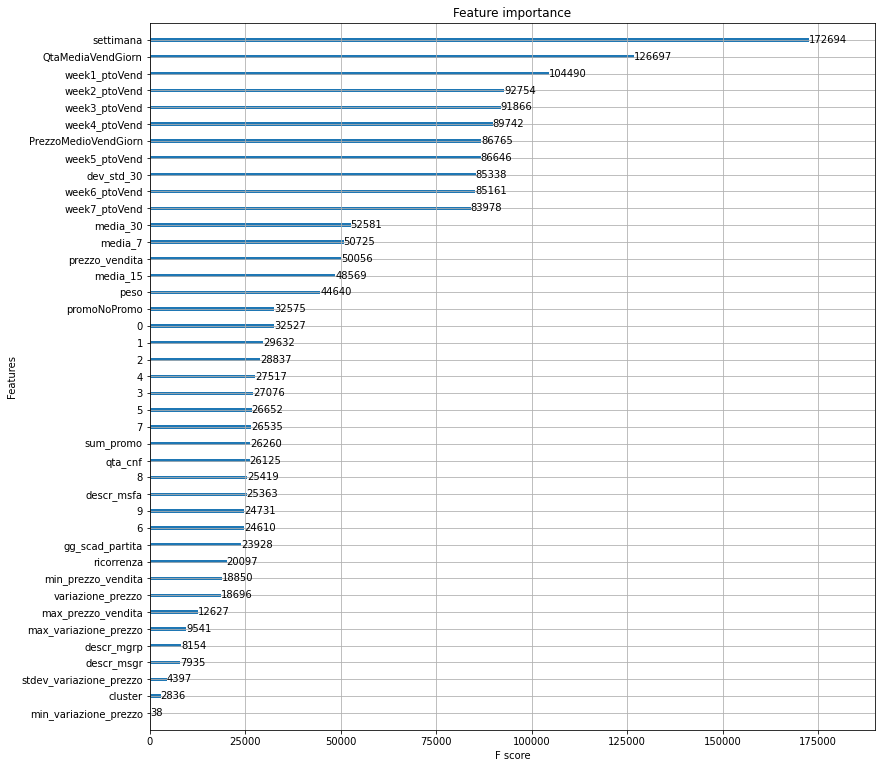

In [24]:
xgb.plot_importance(xg_reg2)
plt.rcParams['figure.figsize'] = [13, 13]
plt.show()

# Data Analysis

In [208]:
df_val['qta_predetta']=np.around(preds2)
df_val['agent_sales']=df_val['qta_venduta']-df_val['inevaso']+df_val['QuantitaResa']+df_val['QuantitaSostituita']
df_val['valore_predetto']=df_val['qta_predetta']*df_val.prezzo_vendita
df_val['valore_ottimo']=df_val['qta_venduta']*df_val.prezzo_vendita
df_val['valore_agente']=df_val['agent_sales']*df_val.prezzo_vendita

In [209]:
df=df_val[['cod_mart','settimana','qta_venduta','qta_predetta','agent_sales']]

In [210]:
df=df.groupby(['cod_mart','settimana']).sum().reset_index()

In [211]:
df[(df.cod_mart==sales_mapping_art['802076'])]

cod_mart  settimana  qta_venduta  qta_predetta  agent_sales
9808       493          2       4140.0        2731.0       4140.0
9809       493          5        690.0         404.0        690.0

In [212]:
def plotta_art(cod_mart):
    plt.plot(df[(df.cod_mart==cod_mart)].reset_index().qta_venduta, 'b') # plotting t, b separately 
    plt.plot( df[(df.cod_mart==cod_mart)].reset_index().qta_predetta, 'g') # plotting t, c separately 
    plt.plot( df[(df.cod_mart==cod_mart)].reset_index().agent_sales, 'r') # plotting t, c separately 
    plt.rcParams['figure.figsize'] = [100, 10]
    plt.show()

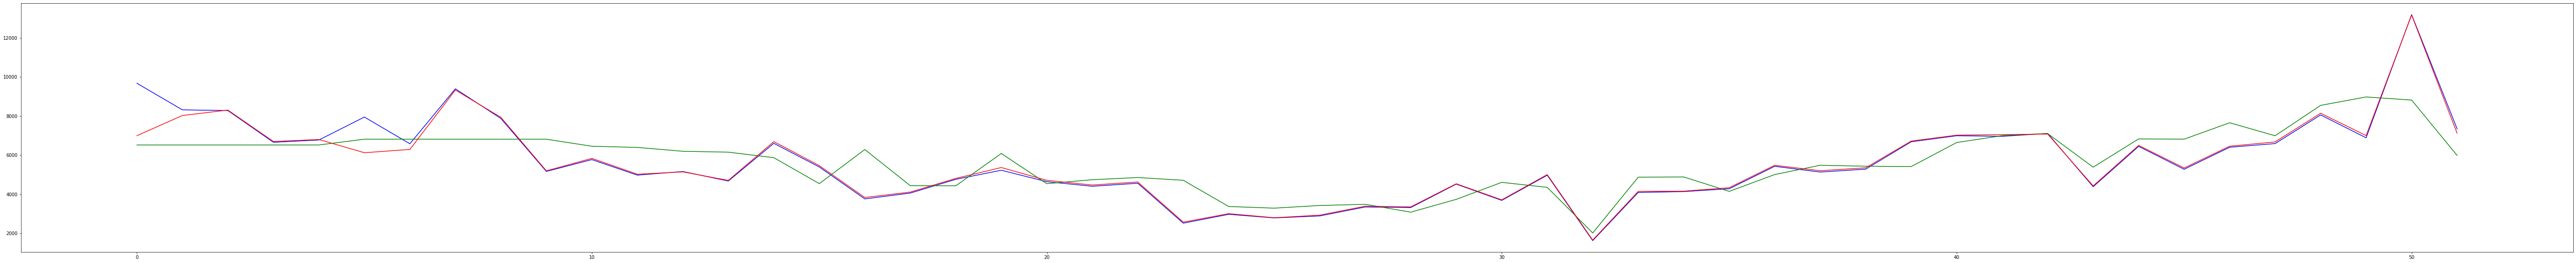

In [159]:
plotta_art(sales_mapping_art['841002'])

In [117]:
import warnings
from sklearn.metrics import *
codici=df_val.cod_mart.unique()
def evaluate(param,dataFrame,dizionario= sales_mapping_art.items(),tweedie=True):
    evaluation=pd.DataFrame(columns=['expV_score','vendite_medie','maxerr','mae','mse','msle','median_absolut','r2s','mpd','mgd','mtd'])
    if(tweedie):
        dataFrame=dataFrame[(dataFrame.agent_sales>0) &(dataFrame.qta_predetta>0)]
        

    inv_map = {v: k for k, v in dizionario}
    elementi= dataFrame[param].unique()
    for elemento in elementi:
        y_true=dataFrame[dataFrame[param]==elemento].agent_sales
        y_pred=dataFrame[dataFrame[param]==elemento].qta_predetta
        
        vendite_medie=y_true.mean()
        
        evs=explained_variance_score(y_true,y_pred)
    #Explained variance regression score function
        maxerr=max_error(y_true, y_pred)
    #max_error metric calculates the maximum residual error.
        mae=mean_absolute_error(y_true, y_pred)
    #Mean absolute error regression loss.
        mse=mean_squared_error(y_true, y_pred)
    #Mean squared error regression loss.
        msle=mean_squared_log_error(y_true, y_pred)
    #Mean squared logarithmic error regression loss.
        medae=median_absolute_error(y_true, y_pred)
    #Median absolute error regression loss.
       # mape=mean_absolute_percentage_error(y_true,y_pred)
    #Mean absolute percentage error regression loss.
        r2s=r2_score(y_true, y_pred,)
    #R^2 (coefficient of determination) regression score function.
        if tweedie:
            mpd=mean_poisson_deviance(y_true, y_pred)
        #Mean Poisson deviance regression loss.
            mgd=mean_gamma_deviance(y_true, y_pred)
        #Mean Gamma deviance regression loss.
            mtd=mean_tweedie_deviance(y_true, y_pred,power=1.7)
        #Mean Tweedie deviance regression loss.
        else:
            mpd=0
            mgd=0
            mtd=0
        evaluation.loc[inv_map[elemento]]=[evs,vendite_medie,maxerr,mae,mse,msle,medae,r2s,mpd,mgd,mtd]
        warnings.filterwarnings('ignore')
    return evaluation.reset_index().sort_values('vendite_medie',ascending=False)

In [118]:
a=evaluate('cod_mart',df_val[(df_val.cod_mdep==0)],sales_mapping_art.items(),tweedie=True)

In [120]:
a[:100]

index  expV_score  vendite_medie   maxerr           mae           mse  \
320   811825    0.060489   37738.240385  34323.0  12937.644231  2.445797e+08   
355   841002    0.651702    5246.264151   5128.0    717.660377  1.219253e+06   
369   873201    0.453076    5213.849057   6562.0    859.830189  2.267370e+06   
331   831001    0.512466    4755.471698   2505.0    622.905660  6.864647e+05   
356   841003    0.664330    4076.584906   3914.0    627.339623  9.389838e+05   
305   802125    1.000000    3450.000000   1038.0   1038.000000  1.077444e+06   
177   138711    0.702178    3182.358491   2805.0    668.396226  8.268307e+05   
370   873202   -0.116556    3018.471698   5970.0    730.188679  1.656094e+06   
14    010900    0.329757    3013.679245   3093.0    424.924528  4.423376e+05   
1209  TLP007    0.078770    2728.792453   3514.0    395.698113  4.473989e+05   
348   833206    0.589661    2560.886792   3529.0    558.094340  7.623813e+05   
207   209110    1.000000    2549.000000   1031.0   1031.000000  1.062961e+06   
361   847307    0.425769    2542.692308   4082.0    484.423077  6.622325e+05   
179   138719    0.642241    2536.584906   2961.0    587.018868  7.528540e+05   
178   138716    0.707335    2514.547170   2072.0    572.037736  5.365769e+05   
304   802076    0.751158    2415.000000   1485.0    860.500000  1.130460e+06   
172   138611    0.651767    2370.403846   3250.0    555.692308  7.379166e+05   
173   138616    0.690885    2131.471698   2964.0    483.320755  5.296517e+05   
339   831009    0.166762    2058.377358   5014.0    612.641509  1.049399e+06   
892   ORT004    0.799934    2046.603774    810.0    207.433962  7.152558e+04   
340   831011    0.467042    1992.264151    989.0    243.716981  1.014084e+05   
897   ORT011    0.785747    1738.716981    589.0    139.169811  3.444355e+04   
349   834015    0.674510    1724.754717    555.0    156.641509  3.822638e+04   
332   831002    0.423860    1717.452830    692.0    203.830189  6.874440e+04   
997   POL023    0.612834    1590.698113   1007.0    197.584906  7.338977e+04   
21    020535    0.553729    1585.333333   1056.0    724.000000  5.804640e+05   
358   841020    0.655504    1572.660377   1909.0    265.377358  1.807609e+05   
333   831003    0.395287    1545.264151    717.0    166.169811  4.694689e+04   
1210  TLP008    0.212074    1516.773585   1891.0    202.962264  1.251298e+05   
918   ORT035    0.853419    1490.830189    422.0     97.433962  1.589725e+04   
84    035704    0.687712    1456.924528    632.0    224.962264  7.657658e+04   
188   156000    0.721090    1393.924528   1060.0    374.264151  2.091683e+05   
102   036040    0.663602    1343.339623   1313.0    287.339623  1.794613e+05   
354   841001    0.414030    1234.150943   1117.0    175.584906  5.911200e+04   
292   752142    0.251423    1208.943396   1286.0    158.754717  6.801611e+04   
871   ORS021    0.713890    1172.094340   9444.0    667.056604  4.769057e+06   
95    035864    0.732595    1168.377358    891.0    225.811321  8.674762e+04   
336   831006    0.573710    1141.207547    805.0    170.811321  5.361764e+04   
76    033839    0.654478    1122.603774    980.0    215.207547  9.401649e+04   
193   165506    0.616653    1118.132075    321.0    115.584906  1.928117e+04   
357   841009    0.379074    1100.169811    970.0    187.169811  7.887506e+04   
341   831014    0.702635    1093.490566    657.0    138.660377  3.514217e+04   
185   138788    0.468017    1085.188679   1489.0    412.245283  3.100570e+05   
88    035724    0.554298    1060.113208    899.0    203.113208  6.565247e+04   
335   831005    0.533434    1054.000000    573.0    146.584906  3.525319e+04   
181   138722    0.500587    1051.660377   1775.0    382.452830  3.016718e+05   
898   ORT012    0.820549    1050.339623    322.0    136.924528  2.296323e+04   
176   138708    0.750180    1036.396226    814.0    181.301887  5.705274e+04   
1002  POR009    0.741054    1019.358491   1165.0    185.584906  7.121128e+04   
174   1